Populating the interactive namespace from numpy and matplotlib


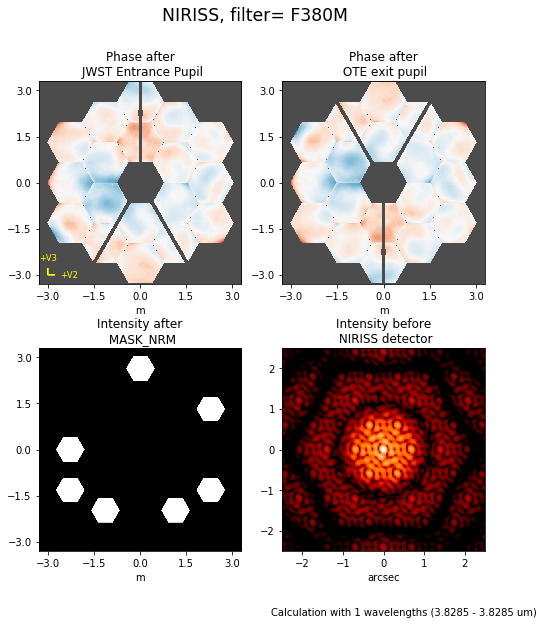

In [19]:
import webbpsf
import numpy as np
import os
%pylab inline
# Monochromatic PSF of aperture mask
ni=webbpsf.NIRISS()
ni.filter='F380M'
ni.pupil_mask='MASK_NRM'
plt.figure(figsize=(8,9))
monochromatic=ni.calc_psf(nlambda=1,display=True)


Text(0.5,1,u'alpha_lyr_stis_005.fits')

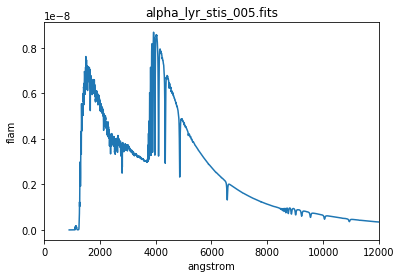

In [20]:
#Source spectra
import pysynphot as S
import matplotlib.pyplot as plt
vega_file=os.path.join(
    os.environ['PYSYN_CDBS'], 'calspec', 'alpha_lyr_stis_005.fits')
vega=S.FileSpectrum(vega_file)
plt.plot(vega.wave, vega.flux)
plt.xlim(0, 12000)
plt.xlabel(vega.waveunits)
plt.ylabel(vega.fluxunits)
plt.title(os.path.basename(vega.name))

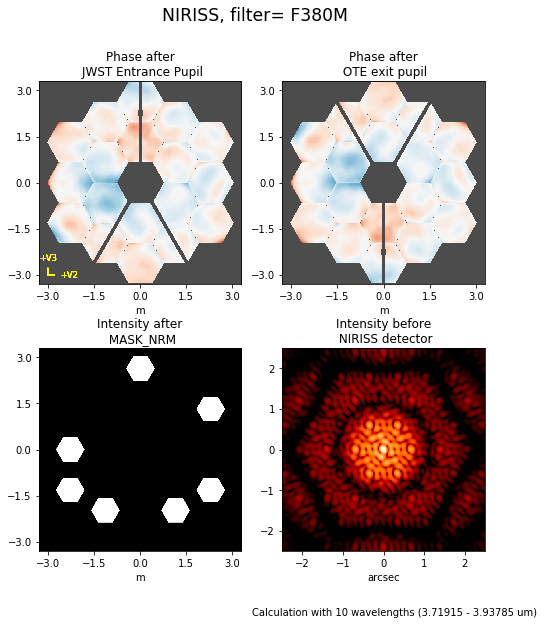

In [21]:
#Broadband PSF
plt.figure(figsize=(8,9))
star=ni.calc_psf(source=vega,display=True)

Text(0.5,1,u'Flat spectrum of 18 abmag')

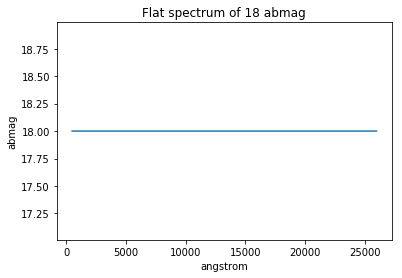

In [22]:
#Black hole source: flat spectra
flatsp = S.FlatSpectrum(18, fluxunits='abmag')
plt.plot(flatsp.wave, flatsp.flux)
plt.xlabel(flatsp.waveunits)
plt.ylabel(flatsp.fluxunits)
plt.title(flatsp.name)


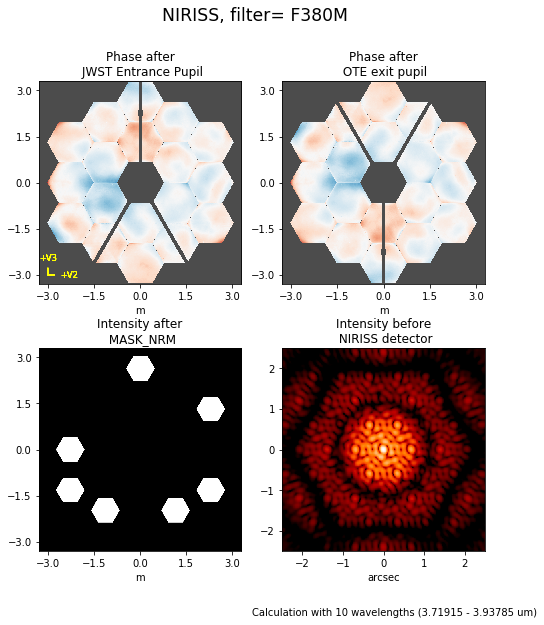

In [13]:
#Flat PSF
plt.figure(figsize=(8,9))
bh=ni.calc_psf(source=flatsp,display=True)

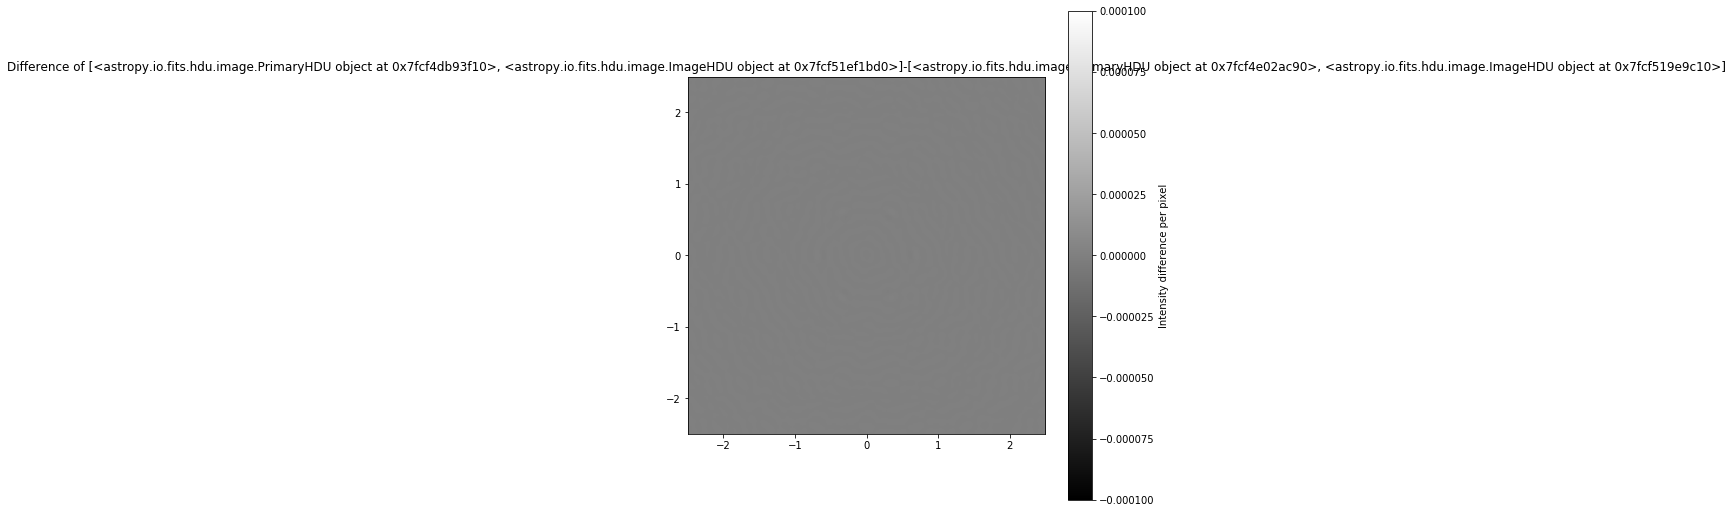

In [16]:
#Display difference between PSFs
plt.figure(figsize=(8,9))
webbpsf.display_psf_difference(monochromatic,star)

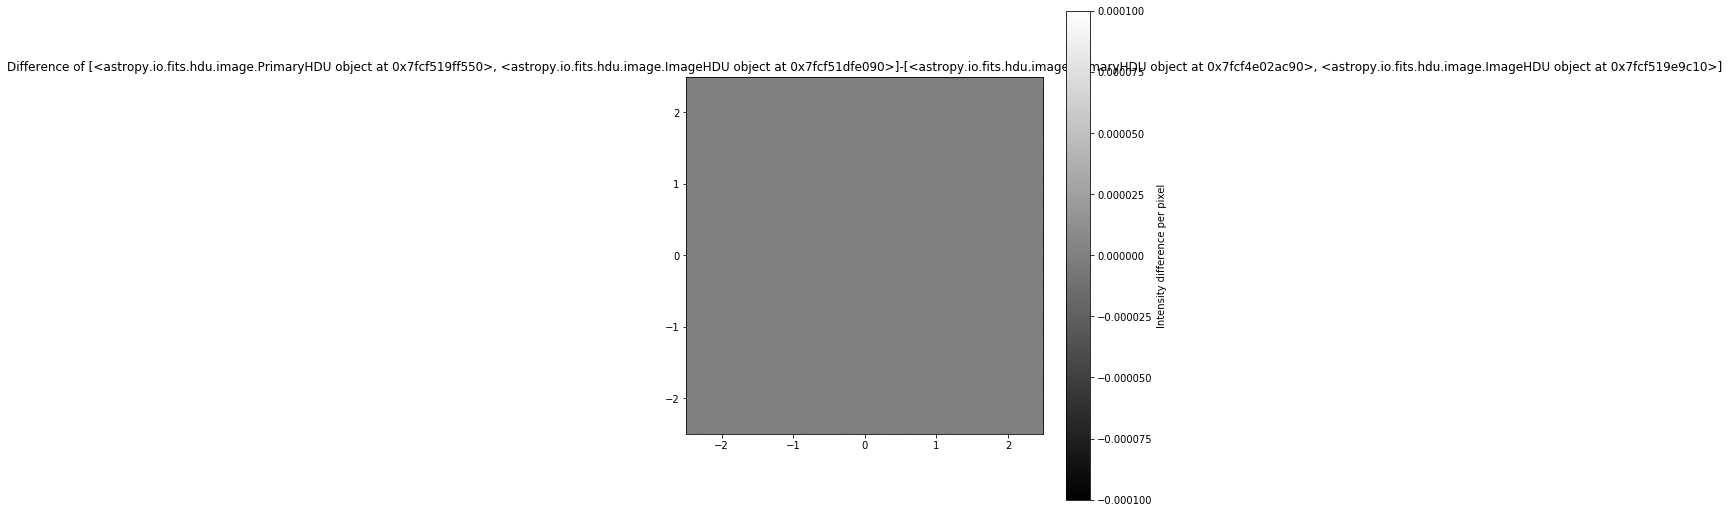

In [17]:
plt.figure(figsize=(8,9))
webbpsf.display_psf_difference(bh,star)

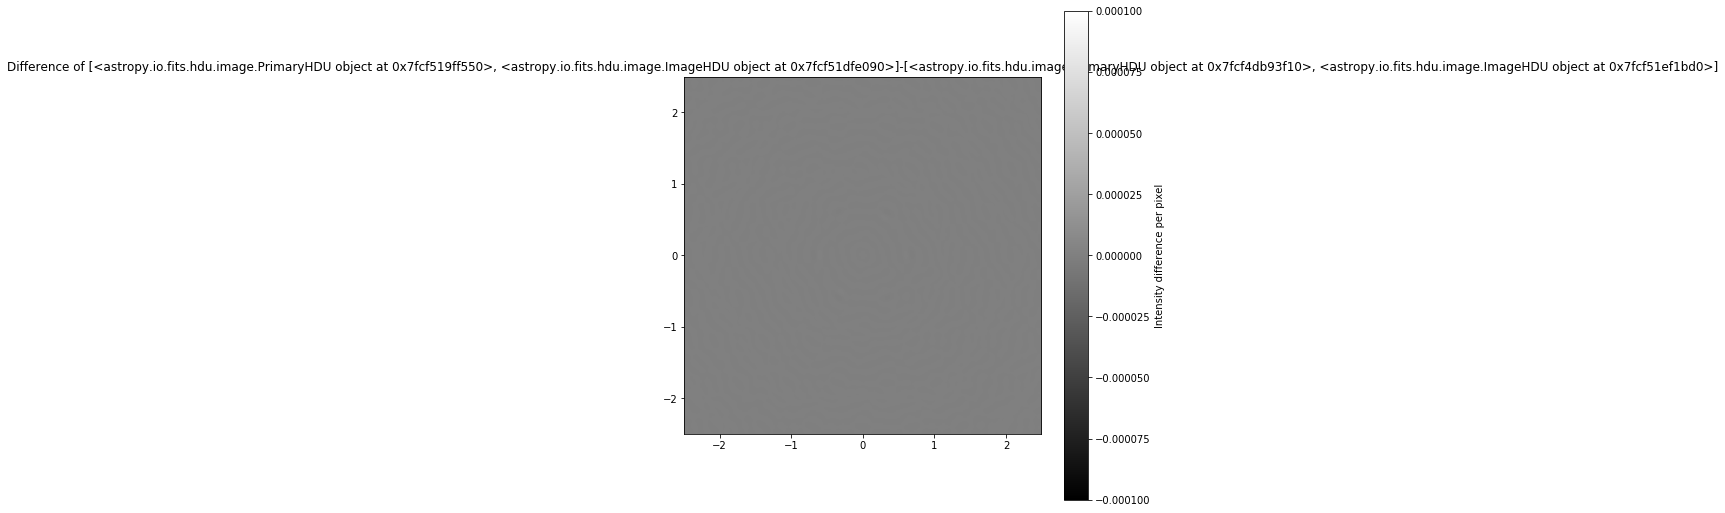

In [18]:
plt.figure(figsize=(8,9))
webbpsf.display_psf_difference(bh,monochromatic)